# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Использовать будем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

импорт библиотек и сохранение данных в переменные

In [1]:
import numpy as np
from scipy import stats as st

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

import time
from tqdm import tqdm 


data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Изучим данные:

In [2]:
display(data_train.info())
display(data_train.head())
display(data_train.describe())
display(data_test.info())
display(data_test.head())
display(data_test.describe())
display(data_full.info())
display(data_full.head())
display(data_full.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


 Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. 

In [3]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

au_recovery_ctrl = ((C*(F-T))/(F*(C-T)))*100

In [4]:
au_recovery_mae = mean_absolute_error(au_recovery_ctrl, data_train['rougher.output.recovery'])
display(au_recovery_mae)

9.73512347450521e-15

In [5]:
display(au_recovery_ctrl.mean())
display(data_train['rougher.output.recovery'].mean())

82.70450164550293

82.70450164550293

Средние значения выборок равны. Небольшое значение МАЕ говорит о том, что их можно считать равными. 

In [6]:
#Проанализируем признаки, недоступные в тестовой выборке:

In [7]:
df_diff = set(data_train.columns)-set(data_test.columns)
print(sorted(df_diff))

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

По полученным данным видно какие признаки недоступны в тестовом датасете, по условиям задачи они рассчитываются позже.
В основном это концентрационные показатели добавляемых и получаемых веществ на разных этапах процесса обработки. Можно предположить, что эти признаки обладают высокой мультиколлинеарностью.

In [8]:
dfs = data_train, data_test, data_full
for df in dfs:
    display(df.isna().sum()[df.isna().sum() > 0])

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.tail_pb                          100
final.output.tail_sol                           5
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 62, dtype: int64

primary_cleaner.input.sulfate                4
primary_cleaner.input.depressant             5
primary_cleaner.input.xanthate               4
rougher.input.feed_rate                      3
rougher.input.feed_size                      1
rougher.input.feed_sol                      21
rougher.input.floatbank10_sulfate            5
rougher.input.floatbank11_sulfate            8
rougher.input.floatbank11_xanthate          25
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.floatbank2_b_air     2
secondary_cleaner.state.floatbank3_a_air     9
dtype: int64

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.tail_ag                            1
final.output.tail_pb                          101
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 63, dtype: int64

Так же в условиях задачи сказано, что данные индексируются по занчениям date, и соседние параметры часто похожи, если они получены в один день, поэтому мы можем заменить пропуски предыдущими значениями в столбце:

In [9]:
for df in dfs:
    df.fillna(method='ffill', inplace=True)
    
for df in dfs:
    display(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)

Series([], dtype: int64)

Series([], dtype: int64)

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:

In [10]:
print("Концентрация до флотации")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(data_full["rougher.input.feed_ag"].mean(),
data_full["rougher.input.feed_pb"].mean(),
data_full["rougher.input.feed_au"].mean()))
print()
print("Концентрация после флотации")
print("Коцентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(data_full["rougher.output.concentrate_ag"].mean(),
data_full["rougher.output.concentrate_pb"].mean(),
data_full["rougher.output.concentrate_au"].mean()))
print()
print("Концентрация после первичной очистки")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(data_full["primary_cleaner.output.concentrate_ag"].mean(),
data_full["primary_cleaner.output.concentrate_pb"].mean(),
data_full["primary_cleaner.output.concentrate_au"].mean()))
print()
print("Концентрация поле вторичной очистки")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(data_full["final.output.concentrate_ag"].mean(),
data_full["final.output.concentrate_pb"].mean(),
data_full["final.output.concentrate_au"].mean()))

Концентрация до флотации
Концентрация Серебра: 8.79,Свинца: 3.59,Золота: 8.27

Концентрация после флотации
Коцентрация Серебра: 11.99,Свинца: 7.61,Золота: 19.77

Концентрация после первичной очистки
Концентрация Серебра: 8.44,Свинца: 9.81,Золота: 32.12

Концентрация поле вторичной очистки
Концентрация Серебра: 5.17,Свинца: 9.98,Золота: 44.08


Напишем функцию, для генерации выборок по нужным металлам для построения графиков:

In [11]:
def met_concentrate(data,before_flot, after_flot, after_primary_clean, after_second_clean):
    met_conc = data[[before_flot,
                         after_flot,
                         after_primary_clean,
                         after_second_clean]]
    met_conc = met_conc.rename(columns={before_flot: 'До флотации',
                         after_flot: "После флотации",
                         after_primary_clean: "После первой очистки",
                         after_second_clean: "После второй очистки"}, index = data['date'])

    return met_conc

In [12]:
au_concetrate = met_concentrate(data_full, 
                       "rougher.input.feed_au", 
                       "rougher.output.concentrate_au", 
                       "primary_cleaner.output.concentrate_au", 
                       "final.output.concentrate_au")
ag_concetrate = met_concentrate(data_full, 
                       "rougher.input.feed_ag", 
                       "rougher.output.concentrate_ag", 
                       "primary_cleaner.output.concentrate_ag", 
                       "final.output.concentrate_ag")   
pb_concetrate = met_concentrate(data_full, 
                       "rougher.input.feed_pb", 
                       "rougher.output.concentrate_pb", 
                       "primary_cleaner.output.concentrate_pb", 
                       "final.output.concentrate_pb") 

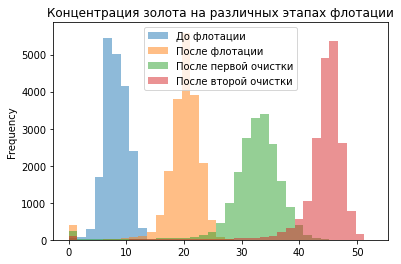

In [13]:
au_concetrate.plot(kind='hist', bins=35, alpha=0.5)
plt.title('Концентрация золота на различных этапах флотации')
plt.show()

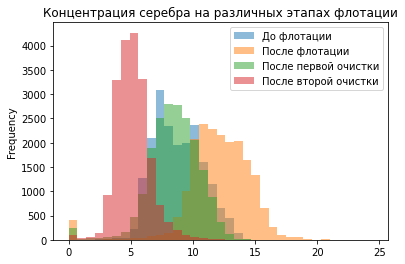

In [14]:
ag_concetrate.plot(kind='hist', bins=35, alpha=0.5)
plt.title('Концентрация серебра на различных этапах флотации')
plt.show()

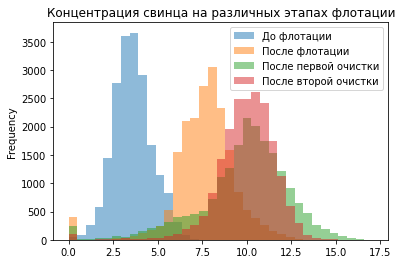

In [15]:
pb_concetrate.plot(kind='hist', bins=35, alpha=0.5)
plt.title('Концентрация свинца на различных этапах флотации')
plt.show()

Концентрация золота после каждого этапа обработки растет, 
концентрация серебра падает, а концентрация свинца в начале процесса растет, в конце-падает.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

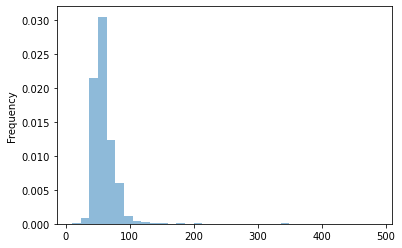

In [16]:
data_train['rougher.input.feed_size'].plot(kind='hist', density=True, bins=35, alpha=0.5)
display(data_train['rougher.input.feed_size'].describe())


count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

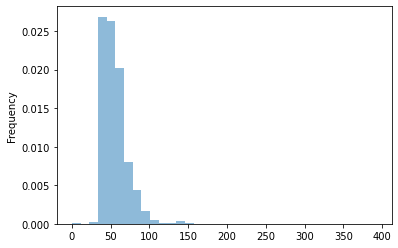

In [17]:
data_test['rougher.input.feed_size'].plot(kind='hist', density=True, bins=35, alpha=0.5)
display(data_test['rougher.input.feed_size'].describe())

Выборки различаются по размерам, но большой разницы в средних значениях нет. Будем считать распределения равными.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [18]:
met_con = pd.DataFrame()
met_con['date'] = data_full['date']

met_con['rougher.input.feed'] = (
    data_full['rougher.input.feed_au'] +
    data_full['rougher.input.feed_ag'] +
    data_full['rougher.input.feed_pb'] +
    data_full['rougher.input.feed_sol']
)

met_con['rougher.output.concentrate'] = (
    data_full['rougher.output.concentrate_au'] +
    data_full['rougher.output.concentrate_ag'] +
    data_full['rougher.output.concentrate_pb'] +
    data_full['rougher.output.concentrate_sol']
)

met_con['final.output.concentrate'] = (
    data_full['final.output.concentrate_au'] +
    data_full['final.output.concentrate_ag'] +
    data_full['final.output.concentrate_pb'] +
    data_full['final.output.concentrate_sol']
)
display(met_con)

,date,rougher.input.feed,rougher.output.concentrate,final.output.concentrate
0,2016-01-15 00:00:00,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,47.859163,65.908382,64.004667
...,...,...,...,...
19434,2018-08-18 06:59:59,53.415050,70.781325,68.098589
19435,2018-08-18 07:59:59,53.696482,70.539603,68.274362
19436,2018-08-18 08:59:59,54.589604,55.376330,68.226068
19437,2018-08-18 09:59:59,54.027355,69.201689,68.200449


<AxesSubplot:ylabel='Frequency'>

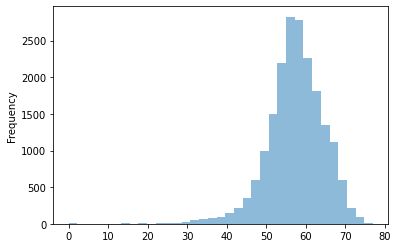

In [19]:
met_con['rougher.input.feed'].plot(kind='hist', bins=35, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

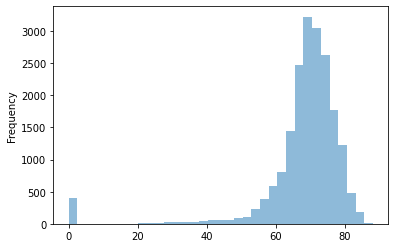

In [20]:
met_con['rougher.output.concentrate'].plot(kind='hist', bins=35, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

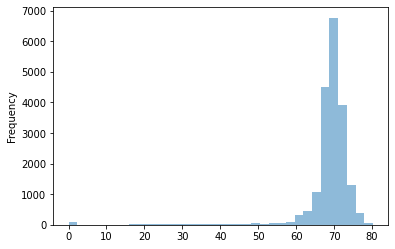

In [21]:
met_con['final.output.concentrate'].plot(kind='hist', bins=35, alpha=0.5)

На всех гистограммах отмечются нулевые значение концентрации, для улучшения качества моделей удалим эти строки:

In [22]:
for_delete = []

for row in met_con.index:
    if (met_con.loc[row, 'final.output.concentrate'] == 0.0 or
        met_con.loc[row, 'rougher.output.concentrate'] == 0.0 or 
        met_con.loc[row, 'rougher.input.feed'] == 0.0):
        for_delete.append(met_con.loc[row, 'date'])
        
data_full.drop(data_full[data_full['date'].isin(for_delete)].index, inplace=True)
data_train.drop(data_train[data_train['date'].isin(for_delete)].index, inplace=True)
data_test.drop(data_test[data_test['date'].isin(for_delete)].index, inplace=True)

data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18949 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                18949 non-null  object 
 1   final.output.concentrate_ag                         18949 non-null  float64
 2   final.output.concentrate_pb                         18949 non-null  float64
 3   final.output.concentrate_sol                        18949 non-null  float64
 4   final.output.concentrate_au                         18949 non-null  float64
 5   final.output.recovery                               18949 non-null  float64
 6   final.output.tail_ag                                18949 non-null  float64
 7   final.output.tail_pb                                18949 non-null  float64
 8   final.output.tail_sol                               18949 non-null  float64


## Модель

In [23]:
#Создадим функцию для расчета метрики sMAPE по заданной в условиях задачи формуле:

In [24]:
def sMAPE(target, predict):
    target = target.to_numpy()
    total = 0
    for y in range(len(target)):
        total += abs(target[y, 0] - predict[y, 0]) / (abs(target[y, 0] + predict[y, 0]) / 2)
    sMAPE_1 = total / len(target) * 100
    
    total = 0
    for y in range(len(target)):
        total += abs(target[y, 1] - predict[y, 1]) / (abs(target[y, 1] + predict[y, 1]) / 2)
    sMAPE_2 = total / len(target) * 100
    
    return 0.25 * sMAPE_1 + 0.75 * sMAPE_2

Масштабируем данные:

In [25]:
features = data_train.drop(df_diff, axis=1)
features = features.drop('date', axis=1)
target = data_train[['rougher.output.recovery', 'final.output.recovery']]

scaler = StandardScaler()
scaler.fit(features) 
features = scaler.transform(features)

Создадим переменную для передачи скорера в функцию кросс-валидации:

In [26]:
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

Обучим модель линейной регрессии:

In [27]:
model = LinearRegression()

scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
final_score = scores.mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 10.0596020690936


Обучим модель решающего дерева:

In [28]:
best_depth_t = 0
final_score_b = 1000

for depth in tqdm(range(2, 12)):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
    final_score = scores.mean()
    if final_score < final_score_b:
        final_score_b = final_score
        best_depth_t = depth
        
# сохраним лучшие параметры в словаре
tree_best = {'depth':best_depth_t}
print('Средняя оценка качества модели:', final_score_b)

100%|██████████| 10/10 [00:19<00:00,  1.92s/it]

Средняя оценка качества модели: 9.173898877615558


Обучим модель случайного леса:

In [ ]:
best_depth_f = 0
best_est_f = 0
final_score_b = 1000

for est in tqdm(range(10, 51, 10)):
    for depth in range (3, 10):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
        final_score = scores.mean()
        if final_score < final_score_b:
            final_score_b = final_score
            best_est_f = est
            best_depth_f = depth
            
# сохраняем параметры в словаре
forest_best = {'depth':best_depth_f, 'n_estimators':best_est_f}
print('Средняя оценка качества модели:', final_score_b)

 60%|██████    | 3/5 [07:38<05:42, 171.38s/it]

Лучшей оказалась модель обучающего леса, проверим ее на тестовых данных, теперь найдем необходимые значения таргета в полном датасете для тестовой выборке и проверим результаты:

 

In [ ]:
features_train = data_train.drop(df_diff, axis=1)
features_train = features_train.drop('date', axis=1)
features_train = scaler.transform(features_train)
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]

target_test = (
    data_full[data_full['date']
            .isin(data_test['date'])]
    .reset_index(drop=True)
)

features_test = target_test.drop(df_diff, axis=1)
features_test = features_test.drop('date', axis=1)
features_test = scaler.transform(features_test)
target_test = target_test[['rougher.output.recovery', 'final.output.recovery']]

model = RandomForestRegressor(random_state=12345, 
                              n_estimators=forest_best['n_estimators'], 
                              max_depth=forest_best['depth'])
model.fit(features_train, target_train)
predicted = model.predict(features_test)

sMAPE_test = sMAPE(target_test, predicted)
print('Итоговый sMAPE на тестовой выборке:', sMAPE_test)

Проверим модель на адекватност с помощью DummyRegressor:

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
predicted_dummy = dummy_regr.predict(features_test)

sMAPE_dummy = sMAPE(target_test, predicted_dummy)
print('Итоговый sMAPE на dummy:', sMAPE_dummy)

# Вывод:

Результат sMAPE: 7.17. Модель прошла проверку на адекватность: на тестовой выборке превосходит константную модель. 
Задачу можно считать выполненной.